# Importing the Required Libraries

In [1]:
# Basic python libraries.
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get rid of warnings!
import warnings
warnings.filterwarnings('ignore')

# Deep learning libraries.
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.layers import Dense,Dropout,GlobalAveragePooling2D,MaxPooling2D,Flatten,Conv2D,BatchNormalization,Activation
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import itertools

print('Above libraries have been imported.')

Above libraries have been imported.


In [2]:
file_path = '/content/FER 2013 Dataset.zip'

In [3]:
from zipfile import ZipFile
with ZipFile(file_path , 'r') as ZipFile:
  ZipFile.extractall()
  print('Zip file extracted successfully')

Zip file extracted successfully


# Seperating the Training and Validation Data.

In [4]:
# Define the train and validataion data paths.
train_dir = '/content/train'
val_dir = '/content/test'

#Example of Data of Each label

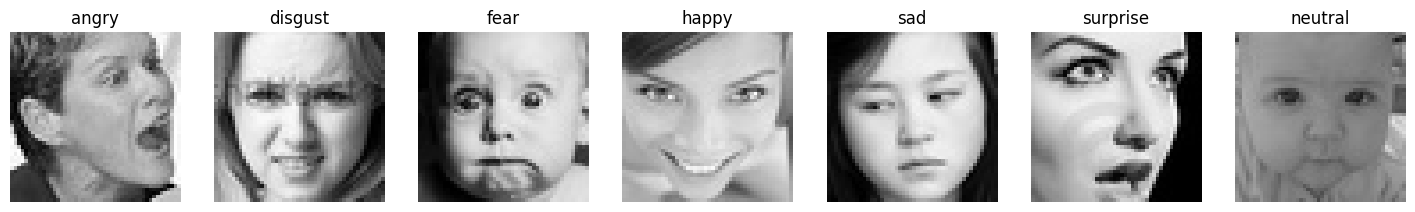

In [5]:
# Define the default image size.
img_size = 48

# Define the seven emotions provided in dataset.
emotion_list = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Plot the images with each distinct emotions.
plt.figure(figsize=(18,22))
i = 1
for expression in emotion_list:
    img = load_img((train_dir + '/' + expression +'/'+ os.listdir(train_dir + '/' + expression)[59]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

**Perform some Data Augmentation on train and validations sets.**

# Data Preprocessing

### Rescaling the Data

In [6]:
# Rescale the data.
'''
Before we proceed we need to rescale our data by multiplying it to 1/255.
This is done so we get target values between 0 and 1.
'''
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )
# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')

Above data generator functions have been created.


### Data Augumentation

In [7]:
# Perform data augmentation.
'''
Data augmentation is a technique to artificially create new training data from existing training data.
It helps us to increase the size of the dataset and introduce variability in the dataset.
'''
# Define the default image size.
img_size = 48

# Define batch size.
batch_size = 64

# Training data.
train_set = datagen_train.flow_from_directory(directory=train_dir,
                                              target_size=(img_size,img_size),
                                              batch_size = batch_size,
                                              color_mode = 'grayscale',
                                              class_mode = "categorical",
                                              shuffle=True
                                              )

# Validation data.
val_set = datagen_train.flow_from_directory(directory=val_dir,
                                              target_size=(img_size,img_size),
                                              batch_size = batch_size,
                                              color_mode = 'grayscale',
                                              class_mode = "categorical",
                                              shuffle=False
                                              )

print('Train and Validation sets have been created.')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.


# Building Custom CNN Model

In [8]:
# First layer
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second layer
model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third layer
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fourth layer
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# First fully connected layer
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

# Second fully connected layer
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

print('CNN model has been created you can proceed to train you data with this model.')

CNN model has been created you can proceed to train you data with this model.


### Model Summary

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

### Visualize the Model

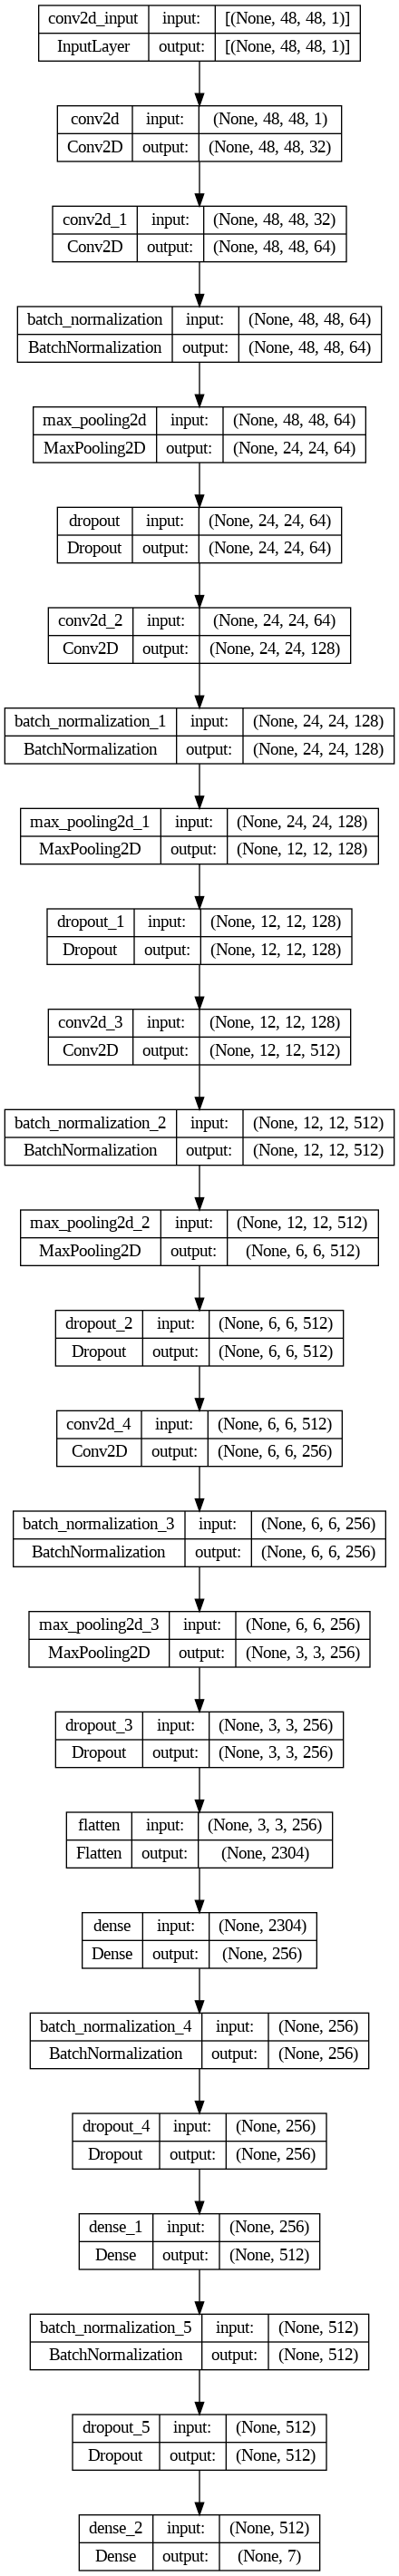

In [10]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

### Training the Model with Dataset

In [11]:
history = model.fit_generator(generator = train_set,
                              steps_per_epoch=train_set.n//train_set.batch_size,
                              validation_data = val_set,
                              validation_steps=val_set.n//val_set.batch_size,
                              epochs = 20)

print('Model has been trained!!')

Epoch 1/20
448/448 [==============================] - 31s 45ms/step - loss: 2.0544 - accuracy: 0.2377 - val_loss: 2.1460 - val_accuracy: 0.2538
Epoch 2/20
448/448 [==============================] - 18s 40ms/step - loss: 1.6347 - accuracy: 0.3665 - val_loss: 1.5158 - val_accuracy: 0.4096
Epoch 3/20
448/448 [==============================] - 19s 42ms/step - loss: 1.3754 - accuracy: 0.4715 - val_loss: 1.3476 - val_accuracy: 0.4915
Epoch 4/20
448/448 [==============================] - 18s 41ms/step - loss: 1.2192 - accuracy: 0.5342 - val_loss: 1.1888 - val_accuracy: 0.5338
Epoch 5/20
448/448 [==============================] - 18s 41ms/step - loss: 1.1461 - accuracy: 0.5656 - val_loss: 1.2399 - val_accuracy: 0.5258
Epoch 6/20
448/448 [==============================] - 19s 42ms/step - loss: 1.0811 - accuracy: 0.5891 - val_loss: 1.1703 - val_accuracy: 0.5671
Epoch 7/20
448/448 [==============================] - 19s 42ms/step - loss: 1.0181 - accuracy: 0.6163 - val_loss: 1.2334 - val_accuracy:

# Model evaluation

### Creating Plots for Accuracy and Loss

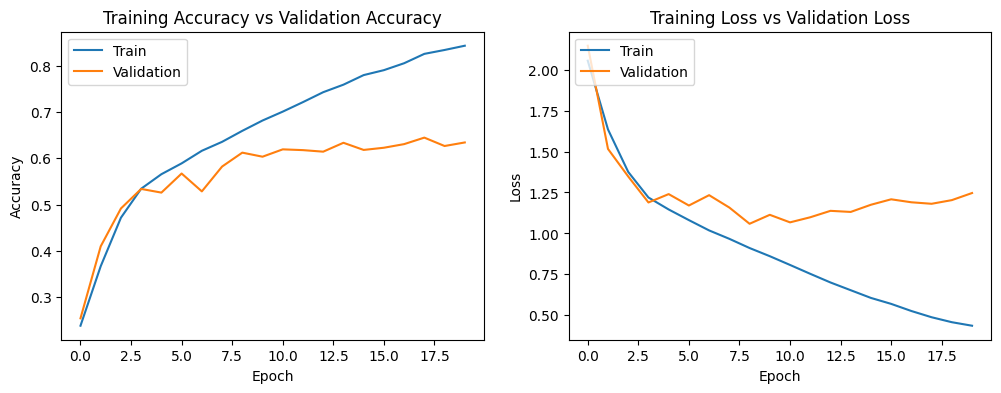

In [12]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Confusion Metrix for Predictions

<Figure size 640x480 with 0 Axes>

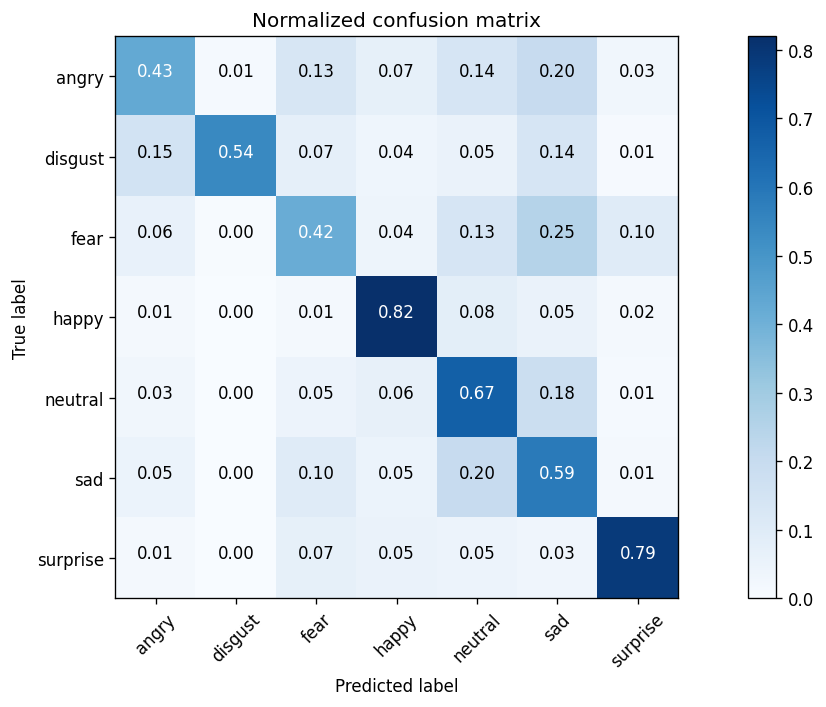

In [13]:
predictions = model.predict_generator(generator=val_set)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = val_set.classes
class_names = val_set.class_indices.keys()

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12,6), dpi=120)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

# Testing the model

### Test 1 (Angry Label Image)

(48, 48)


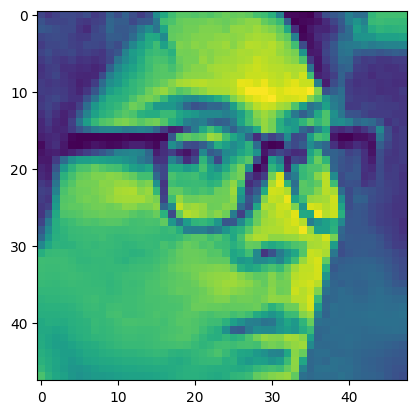

In [17]:
img1 = image.load_img("/content/test/angry/PrivateTest_12000629.jpg",target_size = (48,48),color_mode = "grayscale")
img1 = np.array(img1)
plt.imshow(img1)
print(img1.shape)

In [18]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [20]:
img1 = np.expand_dims(img1,axis = 0) #makes image shape (1,48,48)
img1 = img1.reshape(1,48,48,1)
result = model.predict(img1)
result = list(result[0])
print(result)

1/1 [==============================] - 1s 558ms/step
[0.8874189, 0.0, 5.2223066e-07, 6.8836814e-30, 0.11257395, 6.5665613e-06, 6.3101705e-16]


In [21]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Angry


### Test 2 (Happy Label Image)

(48, 48)


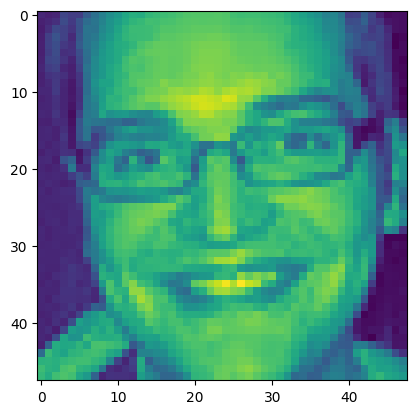

In [25]:
img2 = image.load_img("/content/test/happy/PrivateTest_14522662.jpg",target_size = (48,48),color_mode = "grayscale")
img2 = np.array(img2)
plt.imshow(img2)
print(img2.shape)

In [27]:
img2 = np.expand_dims(img2,axis = 0) #makes image shape (1,48,48)
img2 = img2.reshape(1,48,48,1)
result2 = model.predict(img2)
result2 = list(result2[0])
print(result)

1/1 [==============================] - 0s 27ms/step
[9.0442026e-18, 0.0, 1.0, 5.794352e-26, 1.604077e-32, 2.7955032e-36, 1.1083452e-28]


In [30]:
img_index2 = result2.index(max(result2))
print(label_dict[img_index2])
plt.show()

Happy


# Saving the Model

In [31]:
model.save('model_78.h5')

In [32]:
model.save_weights('model_weights_78.h5')